In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import folium
plt.style.use('bmh') 

df = pd.read_csv('Downloads/911.csv')

In [2]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
missing_values = df.isnull().sum() #checking for missing values 
print(missing_values)

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64


In [5]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [6]:
corr = df.corr() 
print(corr)

          lat       lng       zip   e
lat  1.000000 -0.199432 -0.245963 NaN
lng -0.199432  1.000000 -0.508580 NaN
zip -0.245963 -0.508580  1.000000 NaN
e         NaN       NaN       NaN NaN


## Data Cleaning 

In [7]:
# Rename columns
df = df.rename(columns = {'lat':'Latitude', 'lng':'Longitude', 'desc':'Description', 'twp':'Township','addr':'Address'})

df['Address'] = df['Address'].fillna('Not Stated') #Fill NaN with Not Stated 
df['Township'] = df['Township'].fillna('Unspecified') #Fill NaN with Unspecified  
mode = df['zip'].mode()[0]  # Compute mode for Zip code Column
df['zip'] = df['zip'].fillna(mode)  # fill NaN values with the mode


In [8]:
missing_values = df.isnull().sum() #checking for missing values 
print(missing_values)

Latitude       0
Longitude      0
Description    0
zip            0
title          0
timeStamp      0
Township       0
Address        0
e              0
dtype: int64


 ## Task 1 # Adding New Columns 

In [9]:
# Splitting Reason from Title Column 
df['Reason'] = df['title'].str.split(':').str[0].str.strip()
df.head()

,Latitude,Longitude,Description,zip,title,timeStamp,Township,Address,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [10]:
# Creating Day & Month Column from TimeStamp 

df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["Year"] = pd.DatetimeIndex(df["timeStamp"]).year
df["Month"] = pd.DatetimeIndex(df["timeStamp"]).strftime("%B")
df["Time"] = pd.DatetimeIndex(df["timeStamp"]).time
df["Day"] = pd.DatetimeIndex(df["timeStamp"]).strftime("%d")
df["DayoftheWeek"] = pd.DatetimeIndex(df["timeStamp"]).dayofweek
df["DayoftheWeek"] = df["DayoftheWeek"].map({0: 'Monday',
                                           1: 'Tuesday',
                                           2: 'Wednesday',
                                           3: 'Thursday',
                                           4: 'Friday',
                                           5: 'Saturday',
                                           6: 'Sunday'})
df.head()

,Latitude,Longitude,Description,zip,title,timeStamp,Township,Address,e,Reason,Year,Month,Time,Day,DayoftheWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,17:40:00,10,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,17:40:00,10,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,December,17:40:00,10,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,17:40:01,10,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,17:40:01,10,Thursday


## Insights & Visulization

## Time Analysis 

timeStamp
Friday       14833
Monday       14680
Saturday     13336
Sunday       12136
Thursday     14478
Tuesday      15150
Wednesday    14879
Name: e, dtype: int64


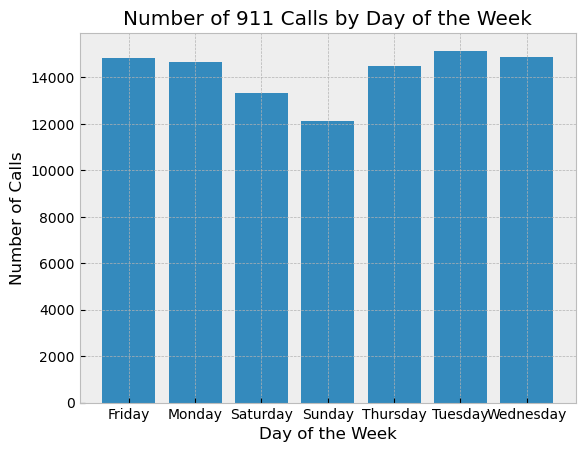

In [11]:
# Number of calls by day of the week

# Convert the timeStamp column to a pandas datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Group by the day of the week and count the number of entries in each group
calls_by_day = df.groupby(df['timeStamp'].dt.day_name())['e'].count()

# Print result 
print(calls_by_day)

#plot bar chart 
plt.bar(calls_by_day.index, calls_by_day.values)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Calls')
plt.title('Number of 911 Calls by Day of the Week')

# Show the plot
plt.show()

In [12]:
# Create a new column for month name
df['month'] = df['timeStamp'].dt.strftime('%B')

# Group the data by month and count the number of calls
calls_by_month = df.groupby('month')['timeStamp'].count().reset_index(name='count')

# Sort the data by number of calls
calls_by_month = calls_by_month.sort_values(by='count', ascending=False)

# Print the result
print(calls_by_month)

      month  count
4   January  13205
5      July  12137
6      June  11786
3  February  11467
8       May  11423
0     April  11326
7     March  11101
1    August   9078
2  December   7969


           Month  Count
0   January 2016  13205
1      July 2016  12137
2      June 2016  11786
3  February 2016  11467
4       May 2016  11423
5     April 2016  11326
6     March 2016  11101
7    August 2016   9078
8  December 2015   7969


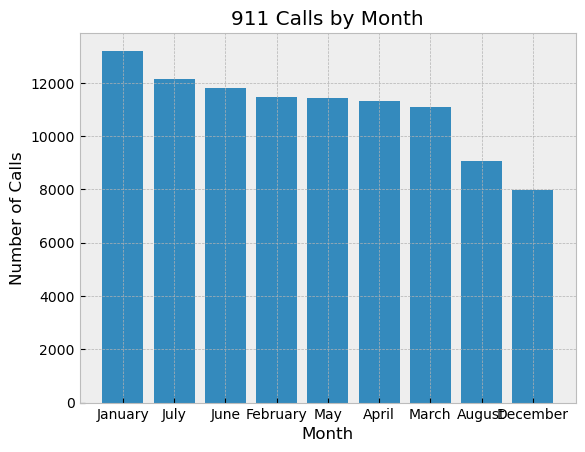

In [13]:
# Call volume per month by years 

df_month = df.groupby(df['timeStamp'].dt.to_period('M')).size().reset_index(name='Count')
df_month['Month'] = df_month['timeStamp'].dt.strftime('%B %Y')
df_month = df_month[['Month', 'Count']].sort_values(by='Count', ascending=False).reset_index(drop=True)
print(df_month)

# Plot bar chart 
plt.bar(calls_by_month['month'], calls_by_month['count'])
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('911 Calls by Month')
plt.show()

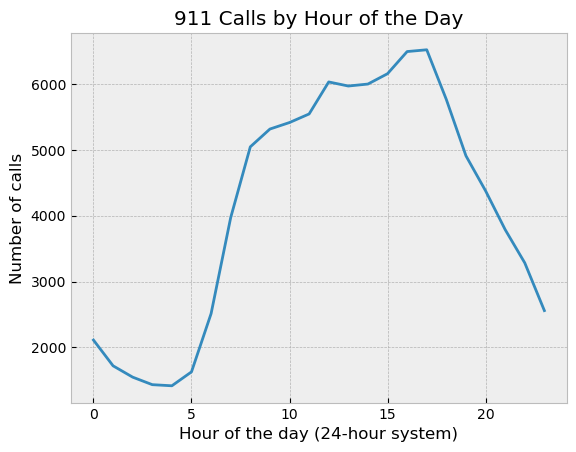

In [14]:
# Extract hour from timeStamp
df['hour'] = df['timeStamp'].dt.hour

# Count the number of calls by hour
calls_by_hour = df.groupby('hour').size().reset_index(name='Count')

# Plot of line chart 
plt.plot(calls_by_hour['hour'], calls_by_hour['Count'])
plt.xlabel('Hour of the day (24-hour system)')
plt.ylabel('Number of calls')
plt.title('911 Calls by Hour of the Day')
plt.show()


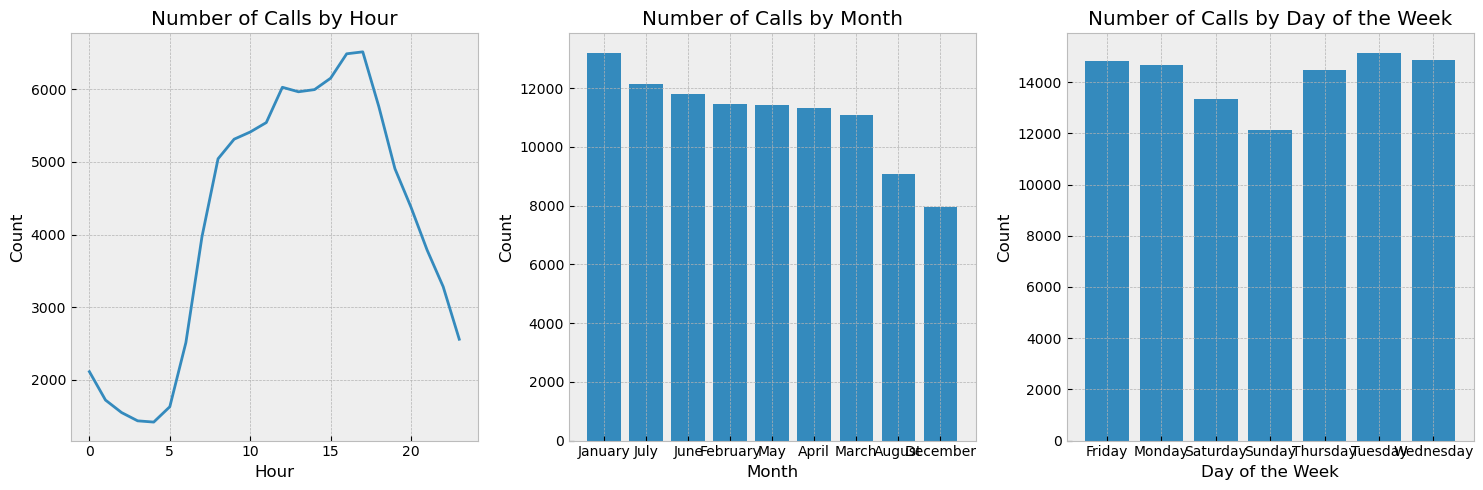

In [15]:
# Create a new column for hour
df['hour'] = df['timeStamp'].dt.hour

# Group the data by hour and count the number of calls
calls_by_hour = df.groupby('hour')['timeStamp'].count().reset_index(name='count')

# Create a subplot with 3 rows and 1 column

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot chart for number of calls by hour as a line chart
axs[0].plot(calls_by_hour['hour'], calls_by_hour['count'])
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Count')
axs[0].set_title('Number of Calls by Hour')

# Create a new column for month name
df['month'] = df['timeStamp'].dt.strftime('%B')

# Group the data by month and count the number of calls
calls_by_month = df.groupby('month')['timeStamp'].count().reset_index(name='count')

# Sort the data by number of calls
calls_by_month = calls_by_month.sort_values(by='count', ascending=False)

# Plot the chart for number of calls by month as a bar chart
axs[1].bar(calls_by_month['month'], calls_by_month['count'])
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Count')
axs[1].set_title('Number of Calls by Month')

# Group the DataFrame by the day of the week and count the number of entries in each group
calls_by_day = df.groupby(df['timeStamp'].dt.day_name())['e'].count()

# Plot the chart for number of calls by day of the week as a bar chart
axs[2].bar(calls_by_day.index, calls_by_day.values)
axs[2].set_xlabel('Day of the Week')
axs[2].set_ylabel('Count')
axs[2].set_title('Number of Calls by Day of the Week')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# Create a new column for the day of the week
df['day_of_week'] = df['timeStamp'].dt.day_name()

# Create a new column for the month name
df['month'] = df['timeStamp'].dt.strftime('%B')

# Get the peak day of the week for 911 calls
peak_day = df['day_of_week'].value_counts().idxmax()
print(f"The peak day for 911 calls is {peak_day}")

# Get the peak month for 911 calls
peak_month = df['month'].value_counts().idxmax()
print(f"The peak month for 911 calls is {peak_month}")

The peak day for 911 calls is Tuesday
The peak month for 911 calls is January


## Geographic Analysis

In [19]:
# Group the data by town and count the number of calls in each group
calls_by_town = df.groupby('Township')['e'].count()

# Sort the data by number of calls
calls_by_town = calls_by_town.sort_values(ascending=False)

# Print the top 10 towns by number of calls
print(calls_by_town.head(10))

Township
LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: e, dtype: int64


In [21]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Group the data by town and count the number of calls in each group
calls_by_town = df.groupby('Township')['e'].count()

# Sort the data by number of calls
calls_by_town = calls_by_town.sort_values(ascending=False)

# Print the top 10 towns by number of calls
print(calls_by_town.head(10))

Township
LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: e, dtype: int64


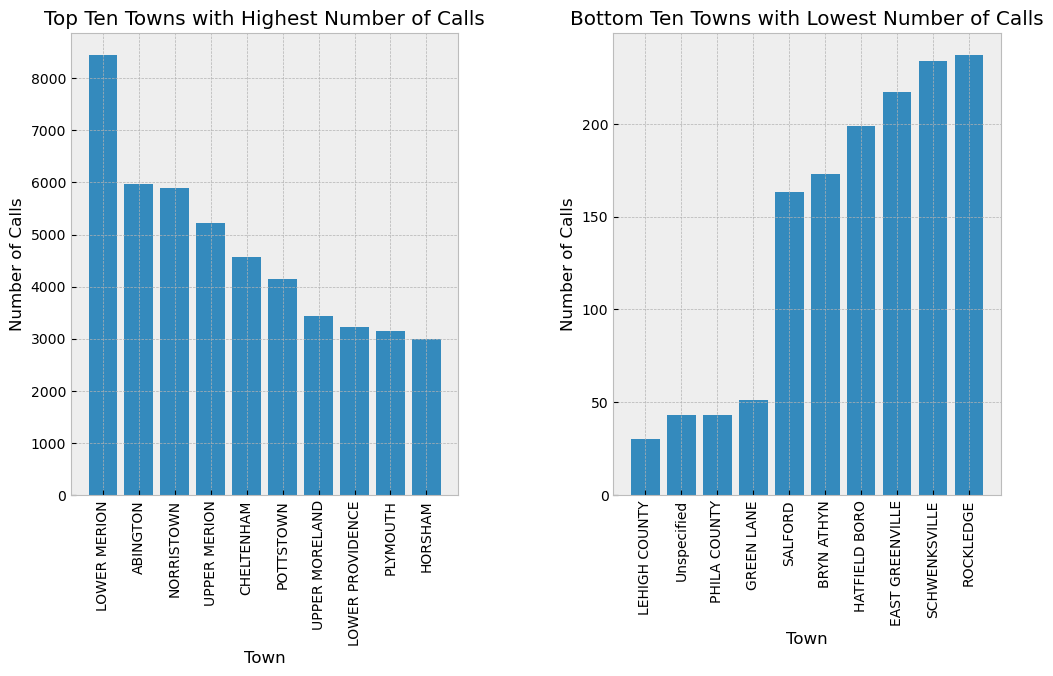

In [19]:
# Get the top and bottom ten towns with the highest and lowest number of calls
calls_by_town = df['Township'].value_counts()
top_towns = calls_by_town.nlargest(10)
bottom_towns = calls_by_town.nsmallest(10)

fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # create fig size

# Plot of the top ten towns (left)
axs[0].bar(top_towns.index, top_towns.values)
axs[0].set_title('Top Ten Towns with Highest Number of Calls')
axs[0].set_xlabel('Town')
axs[0].set_ylabel('Number of Calls')
axs[0].tick_params(axis='x', rotation=90)

# Plot of the bottom ten towns (right)
axs[1].bar(bottom_towns.index, bottom_towns.values)
axs[1].set_title('Bottom Ten Towns with Lowest Number of Calls')
axs[1].set_xlabel('Town')
axs[1].set_ylabel('Number of Calls')
axs[1].tick_params(axis='x', rotation=90)

plt.subplots_adjust(wspace=0.4) # Adjust the spacing between subplots
plt.show() # Display the plot

## Reason Analysis 

Reason
EMS        48877
Fire       14920
Traffic    35695
Name: e, dtype: int64


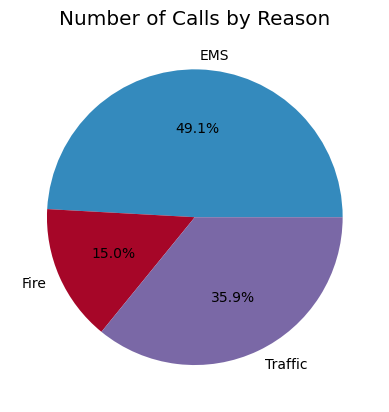

In [20]:
# Group data by reason and count the number of calls for each reason
reason_counts = df.groupby('Reason')['e'].count()

# Print the counts for each reason
print(reason_counts)

# Pie chart of the number of calls for each reason
plt.pie(reason_counts.values, labels=reason_counts.index, autopct='%1.1f%%')

# Set title
plt.title('Number of Calls by Reason')

# Display the plot
plt.show()

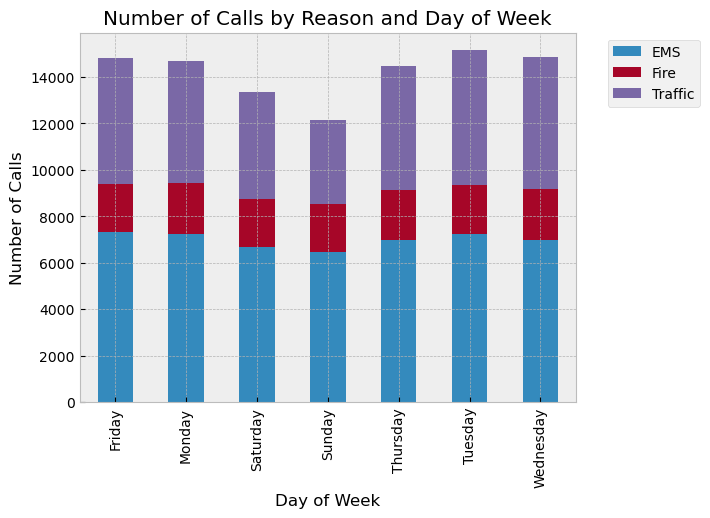

In [21]:
# Group by day of week and reason, and count of calls for each group
day_reason_counts = df.groupby(['DayoftheWeek', 'Reason'])['e'].count().unstack()

# Stacked bar chart of the number of calls for each reason by day of week
day_reason_counts.plot(kind='bar', stacked=True)

# legend position setting
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Title and axis labels
plt.title('Number of Calls by Reason and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')

# Display the plot
plt.show()

In [22]:
df['title'].value_counts().head() 

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

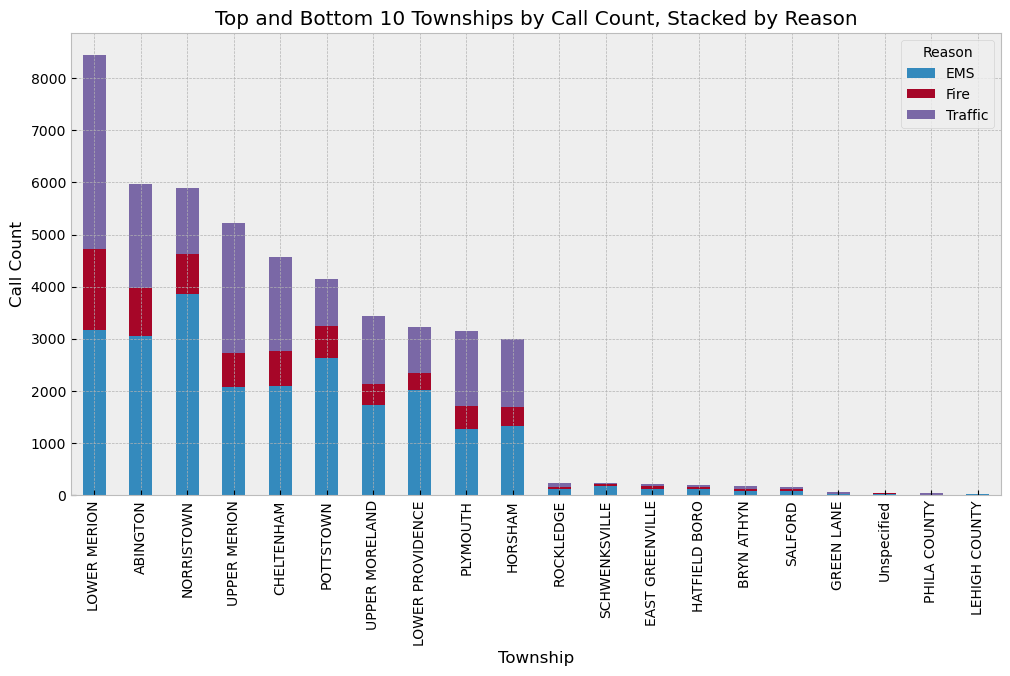

In [23]:
# Get the top 10 and bottom 10 townships by call count
top_10 = df['Township'].value_counts().head(10)
bottom_10 = df['Township'].value_counts().tail(10)

# Create a new DataFrame with the top and bottom 10 townships
top_bottom_townships = pd.concat([top_10, bottom_10]).reset_index()
top_bottom_townships.columns = ['Township', 'Call Count']

# Group the data by township and reason, and count the number of calls for each group
grouped = df.groupby(['Township', 'Reason']).size().reset_index(name='Call Count')

# Pivot the data to make a stacked bar chart
pivoted = grouped.pivot(index='Township', columns='Reason', values='Call Count')

# Reindex the DataFrame to match the order in top_bottom_townships
pivoted = pivoted.reindex(top_bottom_townships['Township'])

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
pivoted.plot(kind='bar', stacked=True, ax=ax)

# Set the chart title and axes labels
ax.set_title('Top and Bottom 10 Townships by Call Count, Stacked by Reason')
ax.set_xlabel('Township')
ax.set_ylabel('Call Count')

# Set the legend labels and position
ax.legend(title='Reason', loc='upper right', labels=['EMS', 'Fire', 'Traffic'])


## Seasonal Analysis

season
Winter    35773
Spring    34535
Summer    21215
Fall       7969
Name: title, dtype: int64


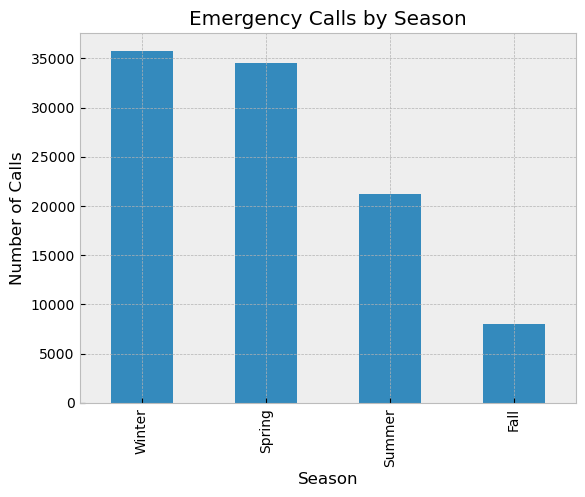

In [24]:
# Create a new column for the month and season of each emergency call
df['month'] = df['timeStamp'].dt.month
df['season'] = pd.cut(df['month'], bins=[0,3,6,9,12], labels=['Winter','Spring','Summer','Fall'])

# Group by month and season and count of emergency calls in each group
by_month = df.groupby('month')['title'].count()
by_season = df.groupby('season')['title'].count()

print(by_season)

# Group by season and count of emergency calls in each group
by_season = df.groupby('season')['title'].count()

# Barchart showing the number of emergency calls by season
by_season.plot(kind='bar')
plt.title('Emergency Calls by Season')
plt.xlabel('Season')
plt.ylabel('Number of Calls')
plt.show()

In [25]:
# Group by season and emergency type and count of emergency calls in each group
by_season_type = df.groupby(['season', 'Reason'])['Reason'].count()

print(by_season_type)

season  Reason 
Winter  EMS        17308
        Fire        5364
        Traffic    13101
Spring  EMS        17134
        Fire        5086
        Traffic    12315
Summer  EMS        10537
        Fire        3374
        Traffic     7304
Fall    EMS         3898
        Fire        1096
        Traffic     2975
Name: Reason, dtype: int64


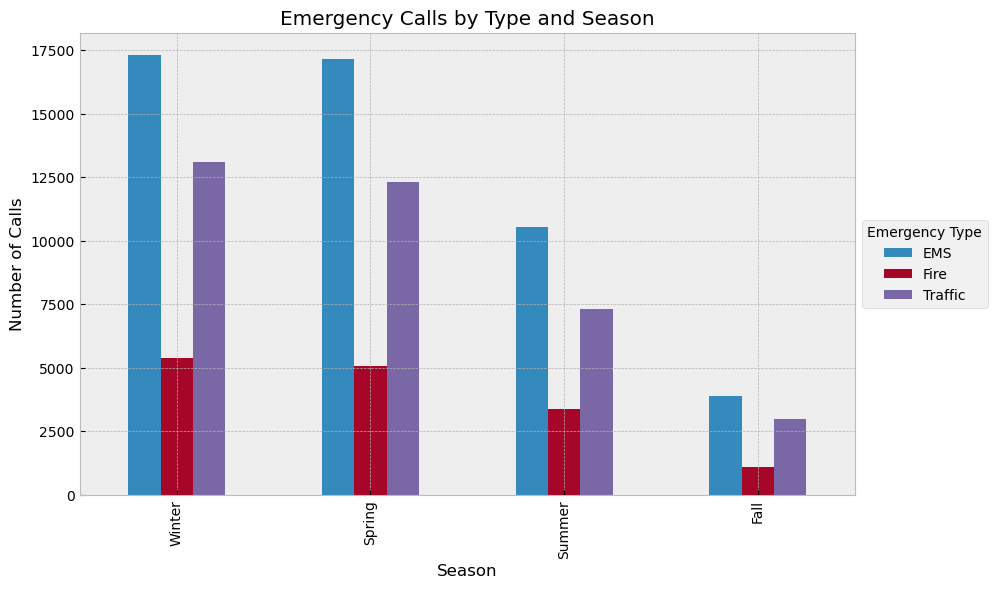

In [35]:
# Data sort by count in descending order
by_season_type = by_season_type.sort_values(['season', 'count'], ascending=[True, False])

# Create a pivot table to reshape the data for plotting
pivot_df = by_season_type.pivot(index='season', columns='Reason', values='count')

# Bar chart plot 
pivot_df.plot(kind='bar', figsize=(10,6))
plt.title('Emergency Calls by Type and Season')
plt.xlabel('Season')
plt.ylabel('Number of Calls')
plt.legend(title='Emergency Type', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Recomendations 

- The data does not include information on response time, data collected in future should inculude response times to improve emergency services operations.


- Increase staffs during peak call times: From the analysis, we can see that the number of emergency calls tends to peak during the daytime hours, with the highest number of calls occurring between 8 AM and 6 PM. Therefore, emergency services should consider increasing staffing during these hours to ensure that they can respond to all calls in a timely manner.


- The analysis showed that certain townships have a much higher number of emergency calls than others. Emergency services should focus on improving response times in these areas.


- The analysis also revealed that EMS type of emergencies are more common than others. Emergency services should focus on enhancing their capabilities in responding to these types of emergencies. 


- The Analysis alos revealed that most emergencies are medical related, the emeregency services should educate the public on other emergencies options available 
